In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.externals import joblib

In [12]:
data=pd.read_csv('train_u6lujuX_CVtuZ9i.csv',index_col='Loan_ID')

In [13]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 1 – Boolean Indexing
What do you do, if you want to filter values of a column based on conditions from another set of columns? For instance, we want a list of all females who are not graduate and got a loan. Boolean indexing can help here. You can use the following code:

In [4]:
data.loc[(data['Gender']=='Female')&(data['Education']=='Not Graduate')&(data['Loan_Status']=='Y'),['Gender','Education','Loan_Status']]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


# 2 – Map Function
map is a series method,which can be used to for series of the variable

In [5]:
data['Gender_num']=data['Gender'].map({'Female':0,'Male':1})
data.reset_index(inplace=True)

In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_num
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0


In [7]:
data.loc[0:4,['Gender','Gender_num']]

,Gender,Gender_num
0,Male,1.0
1,Male,1.0
2,Male,1.0
3,Male,1.0
4,Male,1.0


# 3 – Apply Function
It is one of the commonly used functions for playing with data and creating new variables. Apply returns some value after passing each row/column of a data frame with some function. The function can be both default or user-defined. For instance, here it can be used to find the #missing values in each row and column.

In [8]:
data['Education_len']=data['Education'].apply(len)

In [9]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_num,Education_len
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1.0,8
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1.0,8
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.0,8
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1.0,12
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1.0,8


In [10]:
data.loc[0:4,['Education','Education_len']]

,Education,Education_len
0,Graduate,8
1,Graduate,8
2,Graduate,8
3,Not Graduate,12
4,Graduate,8


In [11]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print("\nMissing values per row:")
print(data.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Gender_num           13
Education_len         0
dtype: int64

Missing values per row:
0    1
1    0
2    0
3    0
4    0
dtype: int64


# 3 – Imputing missing files
‘fillna()’ does it in one go. It is used for updating missing values with the overall mean/mode/median of the column. Let’s impute the ‘Gender’, ‘Married’ and ‘Self_Employed’ columns with their respective modes.

In [12]:
#First we import a function to determine the mode
from scipy.stats import mode
mode(data['Gender'].tolist())

C:\Users\chand\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ModeResult(mode=array(['Male'], dtype='<U6'), count=array([489]))

In [13]:
mode(data['Gender'].tolist()).mode[0]

C:\Users\chand\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Male'

In [14]:
data.drop('Gender_num',axis=1,inplace=True)

In [127]:
data['Gender'].fillna(mode(data['Gender'].tolist()).mode[0],inplace=True)
data['Married'].fillna(mode(data['Married'].tolist()).mode[0],inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed'].tolist()).mode[0],inplace=True)
# data['Dependents'].fillna(mode(data['Dependents'].tolist()).mode[0],inplace=True)
data['Credit_History'].fillna(mode(data['Credit_History'].tolist()).mode[0],inplace=True)
# data['LoanAmount'].fillna(np.mean(data['LoanAmount']),inplace=True)
# data['Loan_Amount_Term'].fillna(np.mean(data['Loan_Amount_Term']),inplace=True)

C:\Users\chand\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [16]:
data.apply(num_missing,axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Education_len         0
dtype: int64

# 4 – Pivot Table
Pandas can be used to create MS Excel style pivot tables. For instance, in this case, a key column is “LoanAmount” which has missing values. We can impute it using mean amount of each ‘Gender’, ‘Married’ and ‘Self_Employed’ group. The mean ‘LoanAmount’ of each group can be determined as:



In [194]:
#determine pivot table
impute_laon_amount=data.pivot_table(values=['LoanAmount'],index=['Gender','Married','Self_Employed'],aggfunc=np.mean)

In [195]:
impute_laon_amount

LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833

In [19]:
data.apply(num_missing,axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Education_len         0
dtype: int64

In [20]:
data.loc()

# 5 – Multi-Indexing
If you notice the output of step #3, it has a strange property. Each index is made up of a combination of 3 values. This is called Multi-Indexing. It helps in performing operations really fast.

Continuing the example from #3, we have the values for each group but they have not been imputed.
This can be done using the various techniques learned till now.

In [21]:
for i,row in data.loc[data['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
    data.loc[i,'LoanAmount']=impute_laon_amount.loc[ind].values[0]

In [22]:
data.apply(num_missing,axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Education_len         0
dtype: int64

# Note:

Multi-index requires tuple for defining groups of indices in loc statement. This a tuple used in function.
The .values[0] suffix is required because, by default a series element is returned which has an index not matching with that of the dataframe. In this case, a direct assignment gives an error.

# 6. Crosstab
This function is used to get an initial “feel” (view) of the data. Here, we can validate some basic hypothesis. For instance, in this case, “Credit_History” is expected to affect the loan status significantly. This can be tested using cross-tabulation as shown below:

In [23]:
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


# converting into percentages,looks good:

In [148]:
def percent(ser):
    return ser/float(ser[-1])
pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True).apply(percent,axis=1)


Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.209524,0.790476,1.0
All,0.312704,0.687296,1.0


# Now, it is evident that people with a credit history have much higher chances of getting a loan as 80% people with credit history got a loan as compared to only 8% without credit history.

But that’s not it. It tells an interesting story. Since I know that having a credit history is super important, what if I predict loan status to be Y for ones with credit history and N otherwise. Surprisingly, we’ll be right 82+378=460 times out of 614 which is a whopping 75%!

I won’t blame you if you’re wondering why the hell do we need statistical models. But trust me, increasing the accuracy by even 0.001% beyond this mark is a challenging task. Would you take this challenge?

Note: 75% is on train set. The test set will be slightly different but close. Also, I hope this gives some intuition into why even a 0.05% increase in accuracy can result in jump of 500 ranks on the Kaggle leaderboard.

In [37]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_len
0,LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,8
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,12
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8


In [43]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [45]:
pd.crosstab(data['Credit_History'],data['Property_Area'],margins=True)

Property_Area,Rural,Semiurban,Urban,All
Credit_History,,,,
0.0,28,30,31,89
1.0,137,187,151,475
All,165,217,182,564


In [46]:
pd.crosstab(data['Credit_History'],data['Property_Area'],margins=True).apply(percent,axis=1)

Property_Area,Rural,Semiurban,Urban,All
Credit_History,,,,
0.0,0.314607,0.337079,0.348315,1.0
1.0,0.288421,0.393684,0.317895,1.0
All,0.292553,0.384752,0.322695,1.0


# 7 – Merge DataFrames
Merging dataframes become essential when we have information coming from different sources to be collated. Consider a hypothetical case where the average property rates (INR per sq meters) is available for different property types. Let’s define a dataframe as:

In [208]:
prop_rates=pd.DataFrame([1000,5000,12000],index=['Rural','Semiurban','Urban'],columns=['Rates'])

In [209]:
prop_rates

,Rates
Rural,1000
Semiurban,5000
Urban,12000


In [56]:
# Now we can merge this information with the original dataframe as:

data_merged=data.merge(right=prop_rates,how='inner',left_on='Property_Area',right_index=True,sort=False)
data_merged

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_len,Rates
0,LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,8,12000
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8,12000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,12,12000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8,12000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,8,12000
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,12,12000
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,8,12000
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.000000,360.0,1.0,Urban,Y,8,12000
11,LP001027,Male,Yes,2,Graduate,No,2500,1840.0,109.000000,360.0,1.0,Urban,Y,8,12000
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.000000,360.0,1.0,Urban,Y,8,12000


In [57]:
data_merged.pivot_table(values='Credit_History',index=['Property_Area','Rates'],aggfunc=len)

,,Credit_History
Property_Area,Rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


The pivot table validates successful merge operation. Note that the ‘values’ argument is irrelevant here because we are simply counting the values.

# 8 – Sorting DataFrames
Pandas allow easy sorting based on multiple columns. This can be done as:

In [77]:
sort_data=data.sort_values(['ApplicantIncome','CoapplicantIncome'],ascending=False)

In [78]:
sort_data[['Loan_ID','ApplicantIncome','CoapplicantIncome']].head()

,Loan_ID,ApplicantIncome,CoapplicantIncome
409,LP002317,81000,0.0
333,LP002101,63337,0.0
171,LP001585,51763,0.0
155,LP001536,39999,0.0
185,LP001640,39147,4750.0


# 9 – Plotting (Boxplot & Histogram)
Many of you might be unaware that boxplots and histograms can be directly plotted in Pandas and calling matplotlib separately is not necessary. It’s just a 1-line command. For instance, if we want to compare the distribution of ApplicantIncome by Loan_Status:

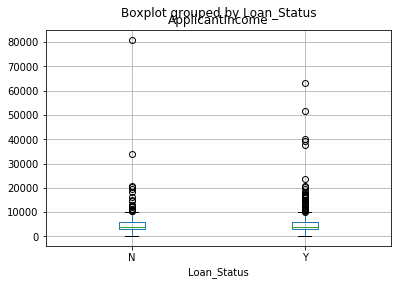

In [76]:
data.boxplot(column='ApplicantIncome',by='Loan_Status')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243B3BA4DA0>,
      dtype=object)

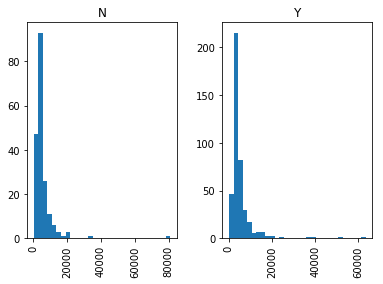

In [71]:
data.hist(column='ApplicantIncome',by='Loan_Status',bins=30)

In [79]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Education_len
0,LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,8
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,8
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,8
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,12
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,8


# 10 – Cut function for binning
Sometimes numerical values make more sense if clustered together. For example, if we’re trying to model traffic (#cars on road) with time of the day (minutes). The exact minute of an hour might not be that relevant for predicting traffic as compared to actual period of the day like “Morning”, “Afternoon”, “Evening”, “Night”, “Late Night”. Modeling traffic this way will be more intuitive and will avoid overfitting.

Here we define a simple function which can be re-used for binning any variable fairly easily.

In [81]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
print(pd.value_counts(data["LoanAmount_Bin"], sort=False))

low          104
medium       273
high         146
very high     91
Name: LoanAmount_Bin, dtype: int64


# 11 – Coding nominal data
Often, we find a case where we’ve to modify the categories of a nominal variable. This can be due to various reasons:

Some algorithms (like Logistic Regression) require all inputs to be numeric. So nominal variables are mostly coded as 0, 1….(n-1)
Sometimes a category might be represented in 2 ways. For e.g. temperature might be recorded as “High”, “Medium”, “Low”, “H”, “low”. Here, both “High” and “H” refer to same category. Similarly, in “Low” and “low” there is only a difference of case. But, python would read them as different levels.
Some categories might have very low frequencies and its generally a good idea to combine them.
Here I’ve defined a generic function which takes in input as a dictionary and codes the values using ‘replace’ function in Pandas.



In [83]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print('Before Coding:')
print(pd.value_counts(data["Loan_Status"]))
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {' N':0,'Y':1})
print('\nAfter Coding:')
print(pd.value_counts(data["Loan_Status_Coded"]))

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


# 12 – Iterating over rows of a dataframe
This is not a frequently used operation. Still, you don’t want to get stuck. Right? At times you may need to iterate through all rows using a for loop. For instance, one common problem we face is the incorrect treatment of variables in Python. This generally happens when:

1.)Nominal variables with numeric categories are treated as numerical.
2.)Numeric variables with characters entered in one of the rows (due to a data error) are considered categorical.
So it’s generally a good idea to manually define the column types. If we check the data types of all columns:

In [92]:
#check data types
data.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
Education_len           int64
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object

Here we see that Credit_History is a nominal variable but appearing as float. A good way to tackle such issues is to create a csv file with column names and types. This way, we can make a generic function to read the file and assign column data types. For instance, here I have created a csv file datatypes.csv.

In [94]:
#Load the file
f=open('datat.csv','w')
for i in range(100):
    f.write(str(i)+','+str(i**2)+'\n')
f.close()

In [153]:
data.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
Education_len           int64
LoanAmount_Bin       category
Loan_Status_Coded       int64
dtype: object

In [134]:
coltypes=pd.read_csv('testestst.csv')

In [135]:
coltypes.rename(columns={'Unnamed: 0':'feature','0':'types'},inplace=True)

In [147]:
print(type(coltypes['types']))

<class 'pandas.core.series.Series'>


In [128]:
np.sum(data['Credit_History'].isnull())

0

# pandas profiling

In [ ]:
import pandas_profiling


In [ ]:
x=pandas_profiling.ProfileReport(data)

In [ ]:
x.to_file(outputfile='D:\CS dojo\Data maipulation 12 techniques using pandas\outputfile.html')